In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/train.CSV", encoding="cp949")
df2 = pd.read_csv("data/test.CSV", encoding="cp949")

col = df.iloc[0,:]
col2 = df2.iloc[0,:]

df.columns = col
df2.columns=col2
df = df.iloc[1:,:].fillna(0)
df2 = df.iloc[1:,:].fillna(0)

df_= df.iloc[:,4:]
imfor_NA = np.array([11,  18,  25,  36, 118, 157, 161, 182, 196, 210, 220, 229, 270, 274, 298]) -1 
df_= df_.drop(imfor_NA,axis=0)
df2_= df2.iloc[:,4:]

df_.replace('없음.', np.nan, inplace=True)
df2_.replace('없음.', np.nan, inplace=True)
df2_= df2_.astype(np.float64)

df_= df_.astype(np.float64)
# 불필요한 변수 삭제 환다 인덱스, 이름 등..

In [3]:
df_.shape

(335, 41)

In [207]:
set(df.columns)
m= set(df2.columns) - set(df.columns)

[k for k in m]

['T_stage',
 'MR_size \n(mm)',
 nan,
 'NME\nfocal:1\nlinear:2\nsegmental:3\nregional:4',
 nan,
 'security \nnumber']

In [4]:
y = df_.iloc[:,[2]].values
test_y = df2_.iloc[:,[2]].values

X= df_.drop([df_.columns[2]],axis=1).fillna(0)
test_X= df2_.drop([df2_.columns[2]],axis=1).fillna(0)

In [5]:
X.shape, test_X.shape,y.shape,test_y.shape

((335, 40), (349, 40), (335, 1), (349, 1))

In [6]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

scale_X = minmax.fit_transform(X)
scale_test_X = minmax.fit_transform(test_X)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tensorflow.keras import backend as K
from keras.optimizers import RMSprop, Adam



model = Sequential()
K.clear_session()
# 입력층 및 은닉층 추가 (입력 20차원, 은닉층 16개 노드)
model.add(Dense(40, input_dim=40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 5. 모델 학습
history = model.fit(scale_X, y, epochs=500, batch_size=16, validation_split=0.3,verbose=0)

# 6. 모델 평가
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Test Accuracy: {accuracy:.4f}")


2024-09-28 15:14:13.738421: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-28 15:14:13.811720: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-09-28 15:14:13.811739: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-09-28 15:14:14.198963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


2024-09-28 15:14:14.838614: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-09-28 15:14:14.838661: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ymlee2-desktop): /proc/driver/nvidia/version does not exist
2024-09-28 15:14:14.839506: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


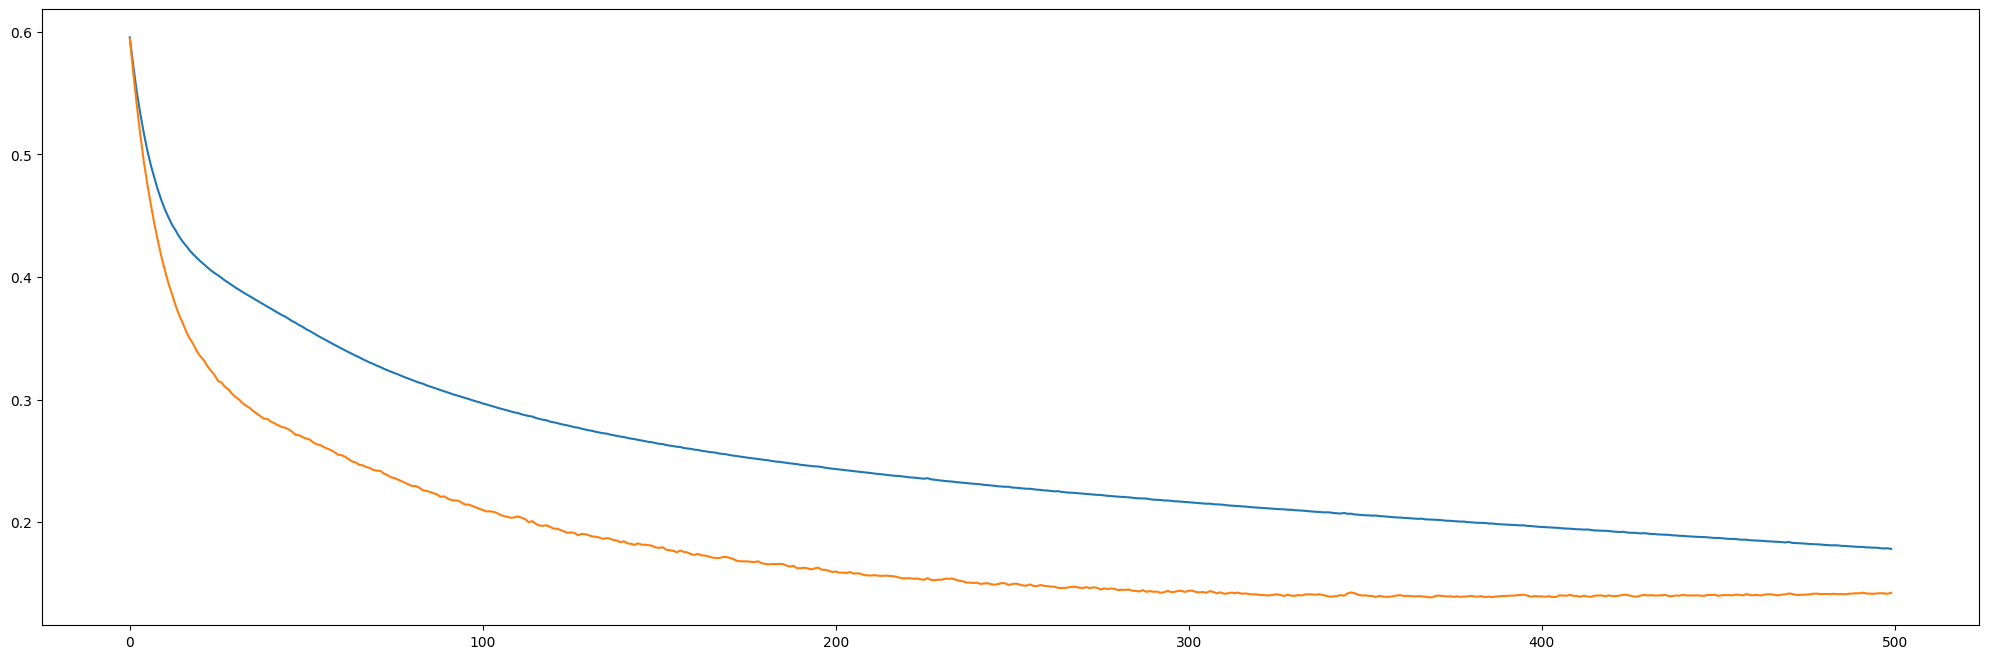

In [8]:
plt.figure(figsize=(25,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [9]:
pred = model.predict(scale_test_X)

11/11 [==============================] - 0s 391us/step


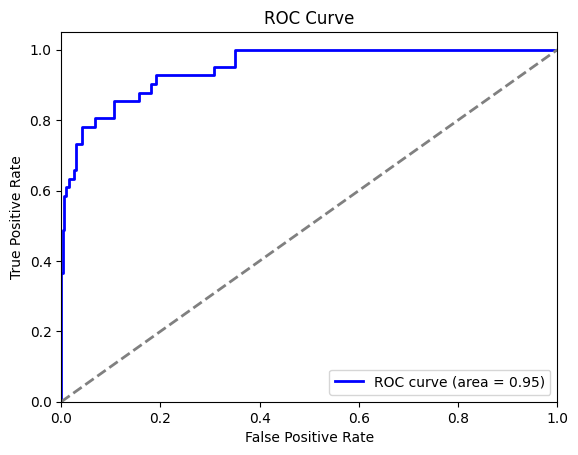

In [10]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(test_y, pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

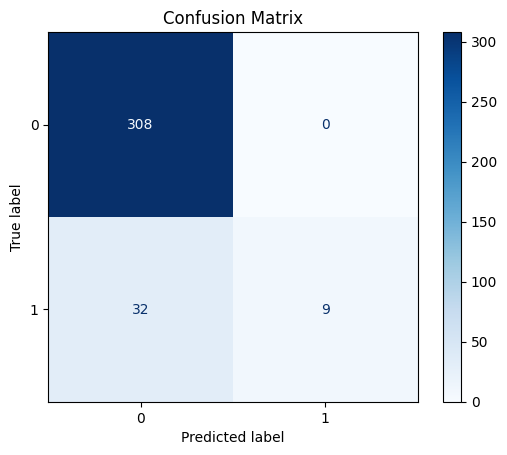

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
predc=(pred > 0.9).astype(int)
cm = confusion_matrix(test_y, predc)

# 11. 혼동행렬 시각화
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()